<h1 align="center">Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості
</h1>

<a href="https://github.com/amx122">Хань Євгеній </a>, 2024

<h2> Завдання для самостійної роботи </h2>

<ol>
    <li>Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).</li>
    <li>Побудувати бінарний МНК-класифікатор згідно з розглянутим вище прикладом і вивести результати бінарної класифікації на графіку. </li>
    <li> Проаналізувати  отримані результати і порівняти їх з результатами, отриманими у лаб роб. 1.</li>
   <li>  В Дати відповіді на контрольні запитання. </li>
    <li> Відправити результати роботи у файлі lab_2_StudentLastName.ipynb до віддаленого репозиторію на GіtHub   </li>
</olol>

<h1> Виконання завдання:</h1>

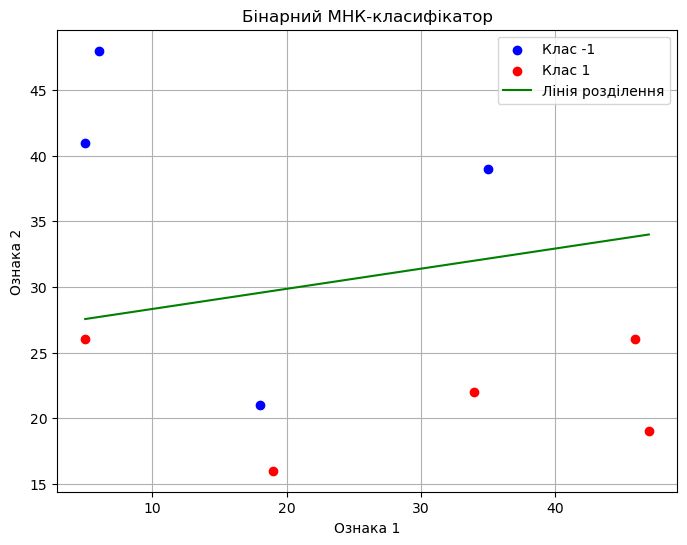

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_6 = np.array([[19, 16],
                      [5, 41],
                      [46, 26],
                      [47, 19],
                      [5, 26],
                      [35, 39],
                      [18, 21],
                      [6, 48],
                      [34, 22]])

y_train_6 = np.array([1, -1, 1, 1, 1, -1, -1, -1, 1])

# Мітки класів
y_train_6_new = np.where(y_train_6 == 1, -1, 1)

# Додаємо зміщення для кожного прикладу
x_train_6_bias = np.c_[x_train_6, np.ones(len(x_train_6))]

# Розрахунок коефіцієнтів
pt = np.sum([x * y for x, y in zip(x_train_6_bias, y_train_6_new)], axis=0)  # Обчислення підсумку
xxt = np.sum([np.outer(x, x) for x in x_train_6_bias], axis=0)  # Обчислення підсумку зовнішнього добутку
w = np.dot(pt, np.linalg.inv(xxt))  # Обчислення вагових коефіцієнтів

# Формування координат для лінії розділення
line_x = np.linspace(min(x_train_6[:, 0]), max(x_train_6[:, 0]), 100)
line_y = -w[0]/w[1] * line_x - w[2]/w[1]

# Формування точок для класу 1 та класу -1
x_minus_1 = x_train_6[y_train_6 == -1]
x_1 = x_train_6[y_train_6 == 1]

# Відображення графіку
plt.figure(figsize=(8, 6))
plt.scatter(x_minus_1[:, 0], x_minus_1[:, 1], color='blue', label='Клас -1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='red', label='Клас 1')
plt.plot(line_x, line_y, color='green', label='Лінія розділення')

plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.title("Бінарний МНК-класифікатор")
plt.legend()
plt.grid(True)
plt.show()


<h1 align="center">Контрольні запитання</h1>

<ol>
    <li>Що таке відступ (margin) і яка його роль в побудові моделі класифікації?
        <ul>
            <li>Відступ (margin) - це відстань від розділяючої границі (лінії, площини тощо), яка розділяє два класи, до найближчої точки цього класу.</li>
            <li>У моделі класифікації відступ відображає ступінь впевненості класифікатора в правильності розділення класів.</li>
            <li>Його роль полягає в тому, щоб забезпечити наявність максимально можливого відступу між класами, що допомагає підвищити загальну універсальність моделі та знизити ризик перенавчання.</li>
        </ul>
    </li>
    <li>Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язання задачі оптимізації через знаходження похідної?
        <ul>
            <li>Функція втрат визначає, наскільки добре модель класифікації працює на зразках навчальних даних.</li>
            <li>Оптимізаційна задача полягає в мінімізації цієї функції, тобто виборі коефіцієнтів моделі таким чином, щоб помилки класифікації були якомога меншими.</li>
            <li>Часто неможливо знайти аналітичний розв'язок для цієї задачі через складність функції втрат та велику кількість параметрів, тому застосовуються ітераційні методи оптимізації, такі як градієнтний спуск.</li>
        </ul>
    </li>
    <li>Чим принципово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лабораторній роботі 1?
        <ul>
            <li>Алгоритм, розглянутий у цій роботі, базується на методі найменших квадратів (МНК) для побудови лінійного класифікатора.</li>
            <li>У лабораторній роботі 1 розглядалась логістична регресія, яка також є методом класифікації, але використовується інший підхід до побудови моделі та розв'язання оптимізаційної задачі.</li>
        </ul>
    </li>
    <li>Вивести математичний вираз для оцінки вектора \( w \):
        <ul>
            <li>Вираз для оцінки вектора \( w \) у бінарному МНК-класифікаторі може бути записаний як:
              \[ w = (X^T X)^{-1} X^T y \]
            </li>
            <li>де:
              <ul>
                <li>\( X \) - матриця ознак (включаючи зміщення) розмірності \( m \times (n+1) \), де \( m \) - кількість прикладів, а \( n \) - кількість ознак.</li>
                <li>\( y \) - вектор міток класів розмірності \( m \times 1 \).</li>
                <li>\( w \) - оцінений вектор коефіцієнтів розмірності \( (n+1) \times 1 \).</li>
              </ul>
            </li>
        </ul>
    </li>
</ol>
структури даних.i>